In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Imported necessary Libraries.

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Imported dataset from CSV file and created DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Getting Information about dataste by using .info()

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype(float)

- Replaced blanks with 0 as Tenure is 0 and no Total Charges is Recorded.
- Changed the Data Type of TotalCharges column from object to float.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checked Duplicate and null value.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
Used describe() method to generate descriptive statistics of Numerical columns.

In [10]:
def convert(value):
    if value == 0:
        return "No"
    else:
        return "Yes"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

Created a function which Converted 1 and 0 values of SeniorCitizen column to Yes and No to make it easier to understand.

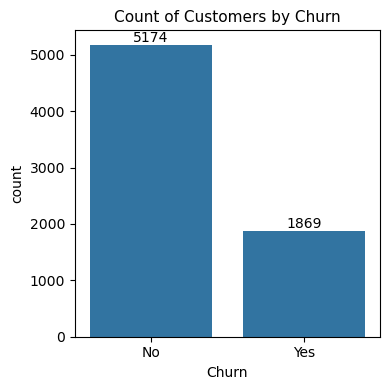

In [46]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn",fontsize =11)
plt.tight_layout()
plt.show()

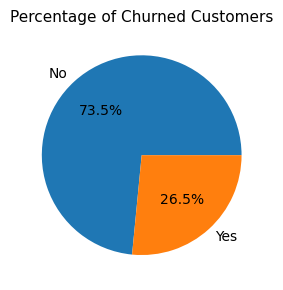

In [45]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({"Churn":"count"})

plt.pie(gb["Churn"],labels = gb.index, autopct = "%1.1f%%")
plt.title("Percentage of Churned Customers",fontsize = 11)
plt.tight_layout()
plt.show()

From the given Pie Chart we can conclude that:
- 26.5% of our customers have churned out.

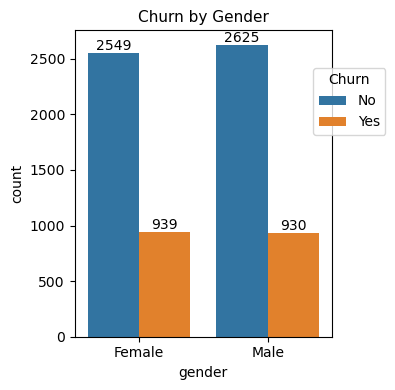

In [57]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender",fontsize =11)
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

Not getting much difference in Churn by Gender.

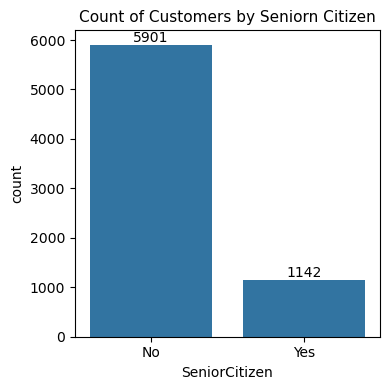

In [47]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Seniorn Citizen",fontsize =11)
plt.tight_layout()
plt.show()

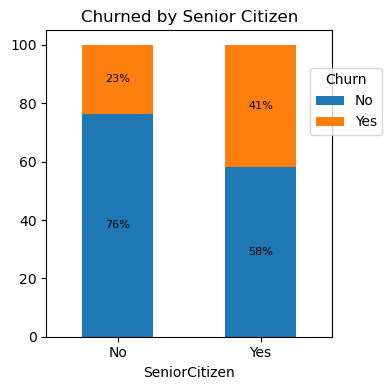

In [75]:
counts = pd.crosstab(df["SeniorCitizen"], df["Churn"])
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind="bar", stacked=True, figsize=(4,4))

for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + h/2, f"{int(h)}%",
                ha="center", va="center", color="black", fontsize=8)

plt.xticks(rotation=0)
plt.title("Churned by Senior Citizen")
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

Comparatively a greater percentage of Customers in Senior Citizen category have Churned.

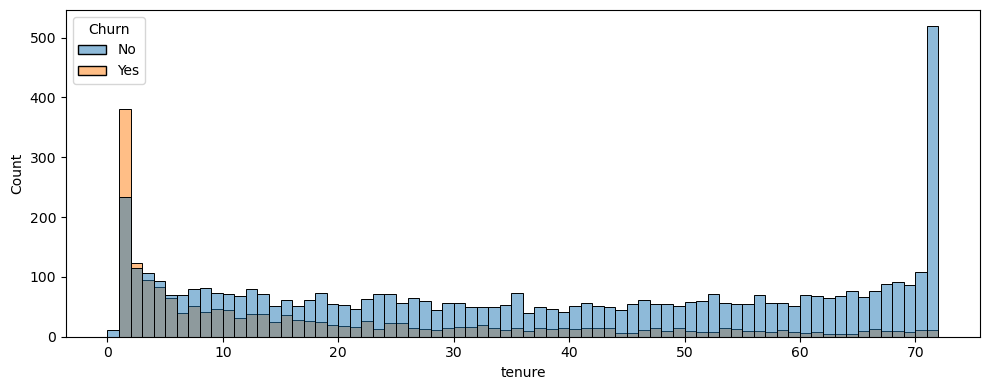

In [48]:
plt.figure(figsize = (10,4))
sns.histplot(x = "tenure", data = df,bins = 72, hue = "Churn")
plt.tight_layout()
plt.show()

Conclusion from Histplot:
- Poeple who have used our services for longer duration have stayed.
- People who have used our services for 1-2 months have churned.

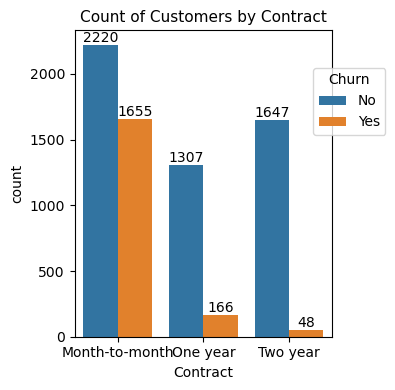

In [56]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract",fontsize =11)
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

Customers who have Month-to-Month contract are more likely to churn than Customers who have One year or Two year contract.

In [51]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

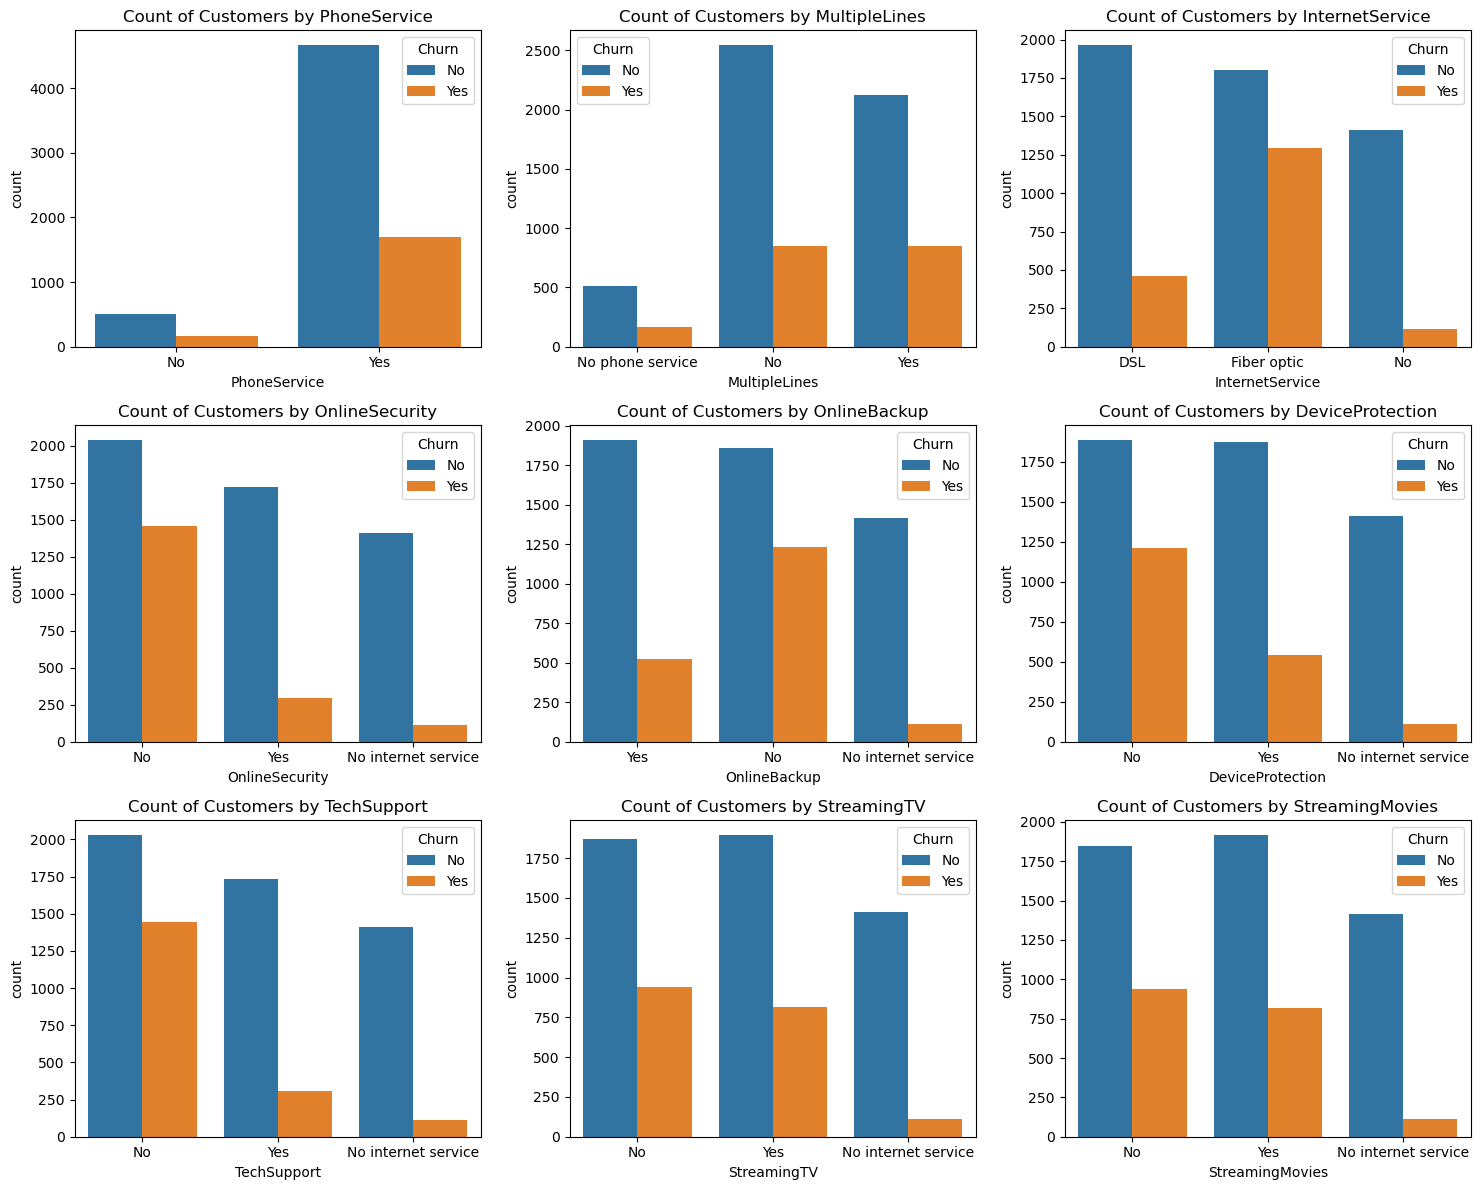

In [55]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue = df["Churn"])
    plt.title(f"Count of Customers by {col}")

plt.tight_layout()
plt.show()


- Fiber optic users show higher churn compared to DSL or no internet service, suggesting dissatisfied service.
- Customers without add-on services (Online Security, Backup, Device Protection, Tech Support) tend to churn more, meaning these features may improve retention.
- Streaming services (TV/Movies) do not show a strong difference in churn, so they may not be a major retention factor.
- Customers with basic PhoneService or MultipleLines have lower churn, indicating core services are relatively stable.

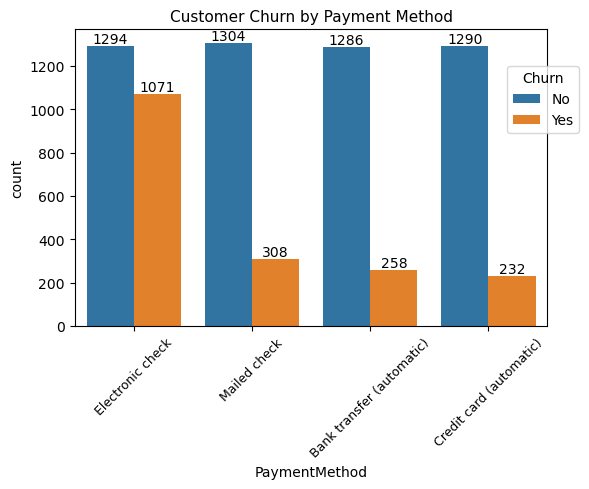

In [74]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn by Payment Method",fontsize =11)
plt.xticks(rotation = 45,fontsize=9)
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

Customers are likely to Churn when they are using Electronic check as Payment Method.